# Network models


In this session we will learn to use [NetworkX](https://networkx.github.io/), a Python package, and we will write code to create random graphs and preferential attachment graphs.

**Note:** The graph generators we ask you to delive for this practice are already implemented in the NetworkX library and in other places online. *Do not copy those implementations:* they reproduce the same kinds of graph but follow a design that is different from what we describe here.


# 0. Code snippets needed

## 0.1. Coin toss (Bernoulli trial)

The following function returns `True` with probability *p*, and `False` with probability *1-p*:

```python
def flip_coin(p):
    if np.random.random() < p:
        return True
    else:
        return False
```

## 0.2. Creating a small graph

Small graphs can be easily created programmatically in Python with NetworkX.

* To create a graph, you use either `networkx.Graph` or `networkx.DiGraph`, which return an undirected an directed graph respectively.
* To add a node to a graph *g*, you use `g.add_node(u)`, where *u* is the name of the node.
* To add an edge to a graph *g*, you use `g.add_edge(u, v)`, where *u* is the name of the source of the edge, and *v* the name of the destination of the edge.

Example:

```python
g = nx.Graph()
g.add_node(0)
g.add_node(1)
g.add_edge(0, 1)
```

## 0.3. Drawing a graph

To draw a graph, you can use:

```python
nx.draw_networkx(g)
```

You can have more control over the visualization of the graph, such as setting the figure size, removing the axis, using a particular layout algorithm, or changing the node size or color:

```python
plt.figure(figsize=(3,3))
plt.axis('off')
pos=nx.spring_layout(g)
nx.draw_networkx(g, pos, with_labels=True, node_size=500, node_color='yellow')
```

Tip: In the graph drawings of ER and BA graphs on this report you can use options `with_labels=False, node_size=10` (you can play with different values for `node_size`)

# 1. Random (ER) graph generator

Write function `generate_random_graph(N, p)`, that:

1. Creates an empty graph
1. Adds N nodes to this graph, numbered from *0* to *N-1*
1. For each pair *(u,v)* of nodes:
   1. With probability *p*, adds an edge between *u* and *v*
1. Returns the graph

Your function should be called with `g = generate_random_graph(N, p)`. Use this function to generate and visualize a few graphs (do some tests with 100 nodes or so and *p=0.005*, *p=0.01*, *p=0.02*, etc.)

In [10]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from collections import OrderedDict

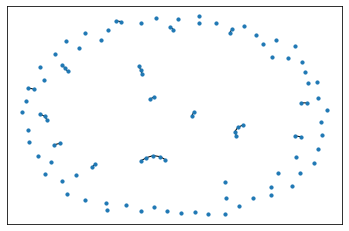

In [11]:
def flip_coin(p): #copyi of the flip_coin function
    if np.random.random() < p:
        return True
    else:
        return False

    
def generate_random_graph(N,p):
    
    g= nx.Graph() #1.An empty graph is created
    
    for u in range(N): #2.it iterates N times, creating N nodes from 0 to N-1
        g.add_node(u)
    
    for u in range(N): #3.compares all the posible pair of nodes, comparing just with nodes from above in the array
        for v in range(u+1,N): 
            if flip_coin(p)==True: #A.with probability p adds an edge between a pair
                g.add_edge(u,v)
            
            
    
    return g #5.returns the graph
                
        
#TEST
test=generate_random_graph(100,0.005)    
nx.draw_networkx(test,with_labels=False, node_size=10)    


Create another function `print_er_statistics(g,p)` that given an ER graph and a probability *p* prints its actual average degree *&lt;k&gt;* and its expected average degree *p(N-1)*. The degree of node *u* in graph *g* is `g.degree(u)`. The number of nodes of the graph *g* is `len(g.nodes())`.


In [12]:
def print_er_statistics(g,p):
    number_nodes=len(g.nodes())
    expected_average=(number_nodes-1)*p
    total_degree=0
    for u in range(number_nodes):
        total_degree=total_degree+g.degree(u)
    actual_average=total_degree/(number_nodes-1)
        
    print("Expected average degree is:", expected_average, "\n","Actual average degree is:", actual_average)


You can use the following function (as-is, or modified) to plot the degree distribution in a graph.

In [13]:
def plot_degree_distribution(g):
    plt.figure(figsize=(4,4))
    plt.axis("on")
    degree_dict = dict(g.degree())
    degree_ordered = OrderedDict(sorted(degree_dict.items(), key=lambda x: x[1], reverse=True))
    degree_sequence = list(degree_ordered.values())
    prob, bin_edges = np.histogram(degree_sequence, bins=range(1,np.max(degree_sequence)+2), density=True)
    plt.loglog(bin_edges[:-1], prob, '.', marker='x')
    plt.title("Probability density function")
    plt.xlabel("degree")
    plt.ylabel("probability")
    plt.show()

## Generated ER graphs

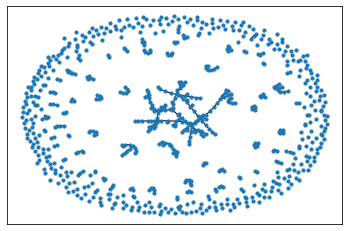

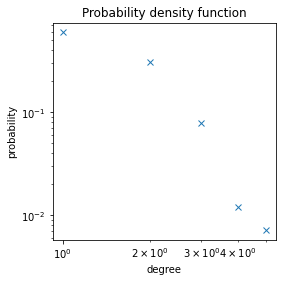

Expected average degree is: 0.749 
 Actual average degree is: 0.8598130841121495






The data consists of 105 observations


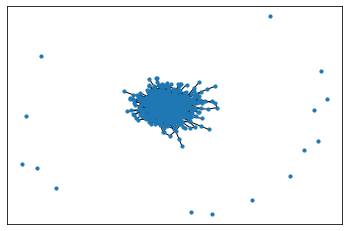

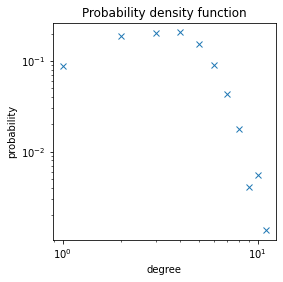

Expected average degree is: 3.745 
 Actual average degree is: 3.6795727636849134








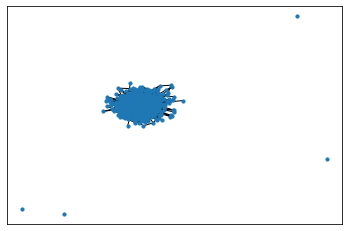

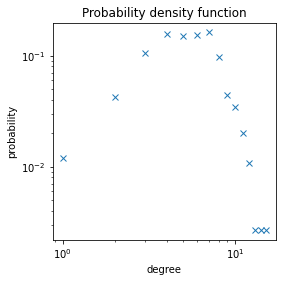

Expected average degree is: 5.992 
 Actual average degree is: 5.8210947930574095








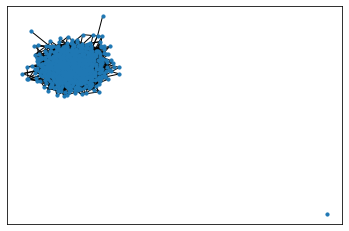

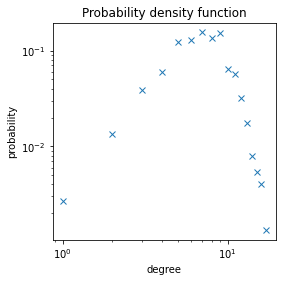

Expected average degree is: 7.49 
 Actual average degree is: 7.481975967957276








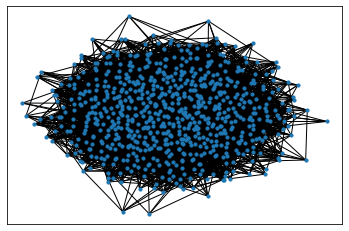

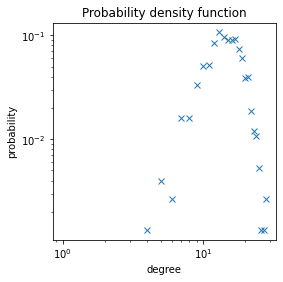

Expected average degree is: 14.98 
 Actual average degree is: 15.086782376502002








In [14]:
#FIVE GRAPHS WITH DIFFERENT PROBABILITES P THAT INCREASE GRADUALLY, PLOTTING EACH NETWORK, ITS DEGREE DISTRIBUTION, EXPECTED AVERAGE DEGREE AND ACTUAL AVERAGE DEGREE
def info(g,p):
    nx.draw_networkx(g,with_labels=False, node_size=10)
    plot_degree_distribution(g)
    print_er_statistics(g,p)
    print("\n\n\n\n\n")
    
N=750        
first= generate_random_graph(N,0.001)
info(first,0.001)

num_observations = 105
print("The data consists of {} observations".format(num_observations))
second= generate_random_graph(N,0.005)
info(second,0.005)

third= generate_random_graph(N,0.008)
info(third,0.008)

forth= generate_random_graph(N,0.01)
info(forth,0.01)

fifth= generate_random_graph(N,0.02)
info(fifth,0.02)


In ER graphs a network of size N is created in which each node has the same probability to connect with the rest of the nodes.
The expected degree tends to be very close to the observed, since in ER networks the standard desviation of a degree is <k>^1/2. The pmf generated visually confirms this theory.
Finally, we can see that when we increase p, the expected degree increases in the same proprtion(<k>=kmax*p), but although the numbers of links also increase in the same proprtion as p, the nominal value increases a lot more than the expected degree because Lmax=N*(N-1) / 2 and kmax=N-1.

# 2. Preferential attachment (BA) generator

Write code for creating a BA graph.

Start by creating an auxiliary function that selects *m* target nodes in a graph *g*, with probabilities proportional to the degrees of the nodes. The function `numpy.random.choice` is used to sample without replacement *m* elements from an array of nodes.

In [15]:
def select_targets(g, m):

    # Check if feasible
    if len(g.nodes()) < m:
        raise ValueError('Graph has less than m nodes')

    # Compute sum of degree
    sum_degree = 0

    # YOUR CODE HERE: COMPUTE SUM OF DEGREE OF NODES
    for u in range(len(g.nodes())):
        sum_degree=sum_degree+g.degree(u)

    if sum_degree == 0:
        raise ValueError('Graph as no edges')

    # Compute probabilities
    probabilities = []
    for u in g.nodes():
        # YOUR CODE HERE: COMPUTE PROBABILITY OF SELECTING NODE u
        prob=g.degree(u)/sum_degree
        # THEN APPEND IT TO probabilities USING probabilities.append(...)
        probabilities.append(prob)
    # Sample with replacement
    selected = np.random.choice(g.nodes(), size=m, replace=False, p=probabilities)

    return selected


Now, create a function `generate_preferential_attachment_graph(N, m0, m)` that:

1. Creates an empty graph
1. Adds nodes numbered from *0* to *m<sub>0</sub> - 1* to the graph
1. Links node *0* to nodes *1, 2, 3, ..., m<sub>0</sub> - 1*
1. For every node *u* numbered from *m<sub>0</sub>* to *N - 1*
   1. Select *m* targets for this node using `select_targets`
   1. Add node *u* (remember to select targets **before** adding the node *u*)
   1. Lnk each node *u* to each of the *m* targets
1. Returns the graph


In [16]:

def generate_preferential_attachment_graph(N, m0, m):
    g= nx.Graph() #1.An empty graph is created
    
    for u in range(m0): #2.Adds nodes numbered from 0 to m0 - 1 to the graph
        g.add_node(u)
        
    for v in range(1,m0): #3.Links node 0 to nodes 1, 2, 3, ..., m0 - 1
        g.add_edge(0,v)
        
    for u in range(m0,N): #4.For every node u numbered from m0 to N - 1
        selection=select_targets(g, m)#A.Select m targets for this node using select_targets
        g.add_node(u)   #B.Add node u
        for s in selection: #C. Link each node u to each of the m targets stored in selection
            g.add_edge(u,s)
        
        
        
   
            
    
    return g #5.returns the graph         




## Generated BA graphs

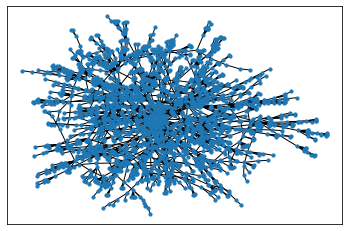

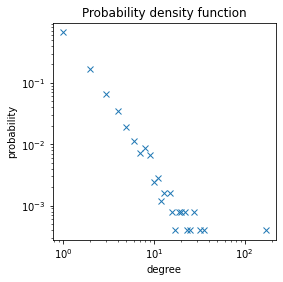

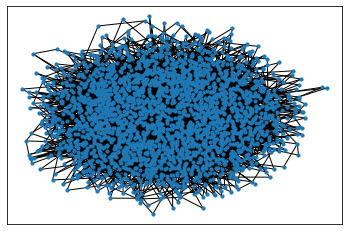

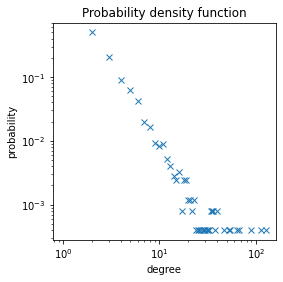

In [17]:
#CREATING TWO PREFERENTIAL ATTACHMEN (BA) GRAPHS
def info2(g):
    nx.draw_networkx(g,with_labels=False, node_size=10)
    plot_degree_distribution(g)
    

y=generate_preferential_attachment_graph(2500, 5, 1)
info2(y)

z=generate_preferential_attachment_graph(2500, 2, 2)
info2(z)

In both graphs a power-law is clearly obseved, so we can confirm that BA graphs it are scale-free networks. 
In these graphs the average degree does not give much information since in this case the variance is much higher and there is no typical scale. The power law usually is between 2 and 3.
We can see two differences between both graphs. First, m0, which is higher in the first and corresponds to the initially created nodes. Second, m (always m<=m0) is the number of links created at each step. We can observe that consequently of this, the second graph contains much more links than the first.

<font size="+2" color="#003300">I hereby declare that, except for the code provided by the course instructors, all of my code, report, and figures were produced by myself.</font>